<a href="https://colab.research.google.com/github/AzamChatrAzar/cattegorical-dataset/blob/main/Iris_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [7]:
# Load Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

In [8]:
# 1. Calculate k = floor(sqrt(n))
n_samples = X.shape[0]
k = int(np.sqrt(n_samples))
print(f"Number of neighbors (k): {k}")

Number of neighbors (k): 12


In [9]:
# 2. Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


In [10]:
# 3. Find k-nearest neighbors for each point
nbrs = NearestNeighbors(n_neighbors=k + 1, algorithm='auto').fit(X_normalized)
distances, indices = nbrs.kneighbors(X_normalized)


In [11]:
# 4. Create a directed weighted graph
G = nx.DiGraph()

# Add nodes with string representation of features
for i in range(n_samples):
    # Convert features to comma-separated string
    features_str = ','.join(map(str, X_normalized[i]))
    G.add_node(i, features=features_str, class_=int(y[i]))


In [12]:
# Add directed edges with inverse distance weights
for i in range(n_samples):
    for j in range(1, k + 1):  # Skip j=0 (the point itself)
        neighbor_idx = indices[i, j]
        distance = distances[i, j]
        if distance > 0:
            weight = float(1.0 / distance)  # Ensure Python float
            G.add_edge(i, neighbor_idx, weight=weight)

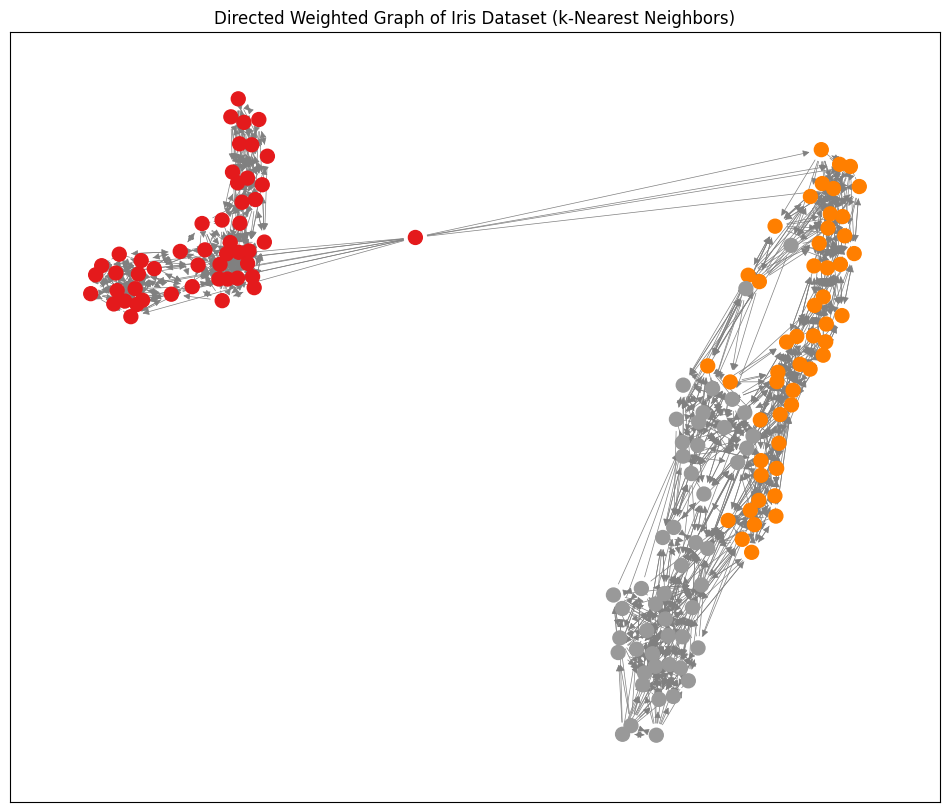

In [14]:
# 5. Draw the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)  # Node positions
node_colors = [y[i] for i in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.Set1, node_size=100)
nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.5, arrows=True)
plt.title("Directed Weighted Graph of Iris Dataset (k-Nearest Neighbors)")
plt.show()

In [15]:






# 6. Save the graph (using string representation)
nx.write_graphml(G, "iris_directed_weighted.graphml")

# Graph analysis
print("\nGraph Analysis:")
print(f"- Number of nodes: {G.number_of_nodes()}")
print(f"- Number of edges: {G.number_of_edges()}")
print(f"- Average in-degree: {np.mean([d for n, d in G.in_degree()])}")
print(f"- Average out-degree: {np.mean([d for n, d in G.out_degree()])}")


Graph Analysis:
- Number of nodes: 150
- Number of edges: 1798
- Average in-degree: 11.986666666666666
- Average out-degree: 11.986666666666666
